In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Defining the number of rows and columns to be visible
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

# Defining plot style
plt.style.use('ggplot')

# 1. Importing Data

In [2]:
bank_customer_df = pd.read_csv('data/churn-modelling.zip')

display(bank_customer_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Given:**

* `Exited` is the target column here
* The value in the `Exited` column can either be `0` or `1`  
    
    * Where `0` signifies that the customer is retained
    
    * and `1` signifies that customer exited the bank

## 1.1 Inspecting data shape

In [3]:
bank_customer_df.shape

(10000, 14)

**Observation:** There are 10000 rows and 14 columns in the data

## 1.2 Checking the data type of columns and null values (if exists)

In [4]:
bank_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation:** The data type associated with every columns are all correct.

# 2. Getting the unique value count of every column

Following things will be inferred:

* Columns that can be dropped directly
    
    * Either a column will have all the unique values
    
    * Or a column will have a single value

* Specification of the collected data  

In [5]:
def print_unique_count(df):
    df_columns = df.columns
    
    for col in df_columns:
        print(col, df[col].nunique())

In [6]:
print_unique_count(bank_customer_df)

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


**Observation:**

* The collected data is of 10000 customers
* `RowNumber` and `CustomerId` columns need to be dropped since they are all unique values.
* The data is collected from 3 different geographies. Here, `Geography` refers to the country

## 2.1 Dropping the columns

In [7]:
bank_customer_df = bank_customer_df.drop(columns=['RowNumber', 'CustomerId'])

# 3. Descriptive Analysis

**Columns to work upon**

In [8]:
display(bank_customer_df.columns.tolist())

['Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## 3.1 From which countries the data is collected?

In [9]:
display(bank_customer_df['Geography'].unique().tolist())

['France', 'Spain', 'Germany']

## 3.2 What is the distribution of the countries in the data?

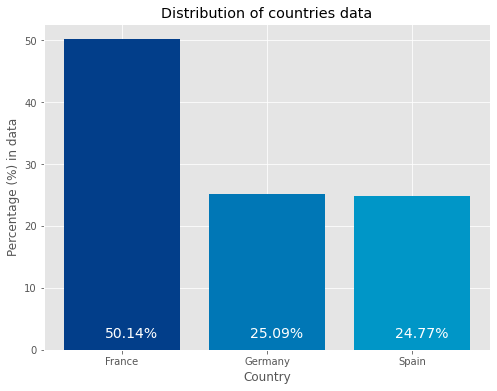

In [10]:
geography_count = bank_customer_df['Geography'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(geography_count.index, geography_count.values*100, 
        color=['#023E8A', '#0077B6', '#0096C7'])

for i, val in enumerate(geography_count.values*100):
    plt.annotate('{}%'.format(round(val, 2)), xy=(0, 0), xytext=(-0.12+i, 2),
             fontsize=14, color='#FFFFFF')

plt.xlabel('Country')
plt.ylabel('Percentage (%) in data')
plt.title('Distribution of countries data')

plt.show()

In [11]:
bank_customer_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1. How many customers left the bank?

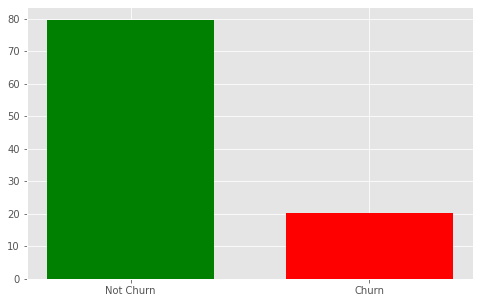

In [36]:
churn_distribution = bank_customer_df['Exited'].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
plt.bar(churn_distribution.index, churn_distribution.values*100, 
        color=['green', 'red'], width=0.7)

plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

### 3. Distribution of Gender

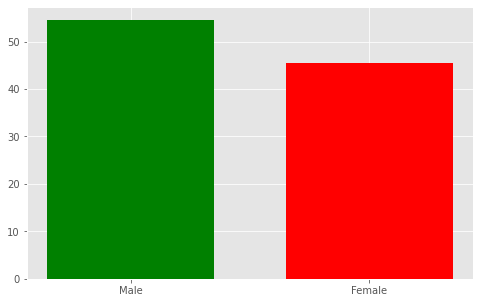

In [47]:
gender_df = bank_customer_df['Gender'].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
plt.bar(gender_df.index, gender_df.values*100, color=['green', 'red'], width=0.7)

plt.show()

### 4. Distribution of Age

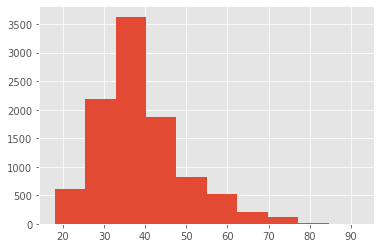

In [52]:
plt.hist(bank_customer_df['Age'])
plt.show()

### 5. Distribution of Tenure

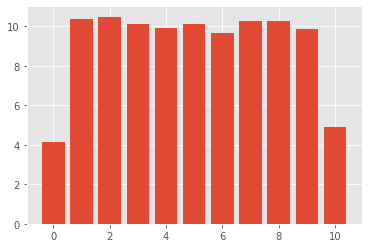

In [54]:
tenure = bank_customer_df['Tenure'].value_counts(normalize=True)

plt.bar(tenure.index, tenure.values*100)
plt.show()

In [56]:
bank_customer_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 5. Distribution of Balance

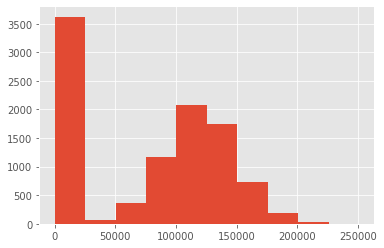

In [57]:
plt.hist(bank_customer_df['Balance'])
plt.show()

### 6. Distribution of Estimated Salary

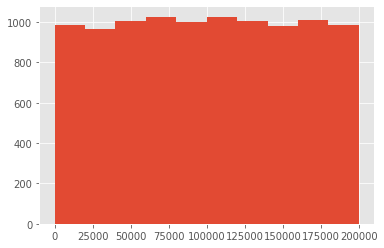

In [60]:
plt.hist(bank_customer_df['EstimatedSalary'])
plt.show()

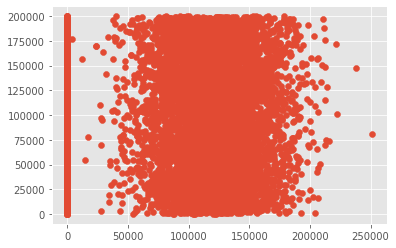

In [62]:
plt.scatter(bank_customer_df['Balance'], bank_customer_df['EstimatedSalary'])

#### Questions:

2. Balance of customers who exited the account.
3. Balance of those customers whose account still exist.
4. Checking the zero entry in `CreditScore` and `Balance`
5. Percentage of customers who exited the account on the basis of gender
6. Relation between `NumOfProducts` with `Balance` and `CreditScore`
7. `CreditScore` vs `HasCrCard`
8. Geography wise exited clients
9. Geography and gender wise exited clients
10. Do `Surname`, `Age` and `Gender` affects client exiting?

### 1. How many customers exited the account?

In [10]:
exited_distribution = df['Exited'].value_counts()

# Total customers closed the account
total_exited = exited_distribution[1]
# Percentage customers closed the account
perc_exited = (total_exited / df.shape[0]) * 100

display_str = 'Out of <strong>{}</strong> customers <strong>{}</strong> closed the account, '\
              'i.e. <strong>{:.2f}%</strong>'.format(df.shape[0], total_exited, perc_exited)

display(HTML(display_str))

### 2. Balance distribution of customers on the basis of account

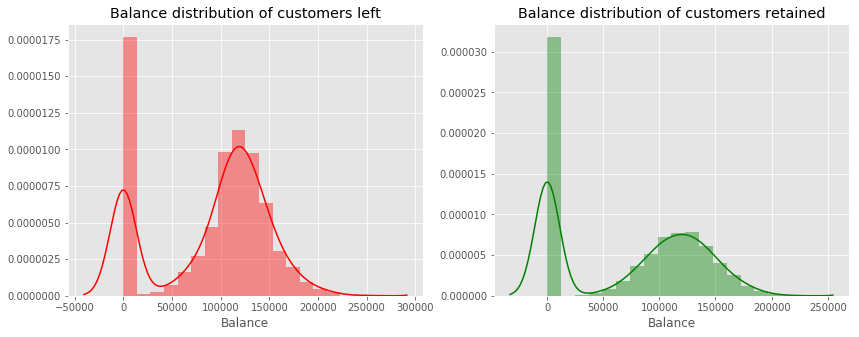

In [11]:
# Closed account
exited_customer = df.loc[df['Exited'] == 1, 'Balance']

# Customers retained
not_exited_customer = df.loc[df['Exited'] == 0, 'Balance']

# Plot size
plt.rcParams['figure.figsize'] = [14, 5]

plt.subplot(1, 2, 1)
sns.distplot(exited_customer, color='red')
plt.title('Balance distribution of customers left')

plt.subplot(1, 2, 2)
sns.distplot(not_exited_customer, color='green')
plt.title('Balance distribution of customers retained')
plt.show()

### 3. Checking zero entry in `Credit Score` and `Balance` for the customers retained?

In [12]:
cust_retained_cr_score = df[(df['Exited'] == 0) & (df['CreditScore'] == 0)]

cust_retained_balance = df[(df['Exited'] == 0) & (df['Balance'] == 0)]

In [13]:
cust_retained_cr_score.shape[0]

0

In [14]:
cust_retained_balance.shape[0]

3117

**3117** entries of balance are missing.

#### Let's give a look at this dataframe

In [15]:
cust_retained_balance.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,0
13,Chin,549,France,Female,25,5,0.0,2,0,0,190857.79,0


For an Active Member how can be the balance be 0

In [16]:
df[(df['Exited'] == 0) & (df['Balance'] == 0) & (df['IsActiveMember'] == 1)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
14,Scott,635,Spain,Female,35,7,0.0,2,1,1,65951.65,0
17,Henderson,549,Spain,Female,24,9,0.0,2,1,1,14406.41,0
19,Hao,726,France,Female,24,6,0.0,2,1,1,54724.03,0
20,McDonald,732,France,Male,41,8,0.0,2,1,1,170886.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9958,Ts'ui,537,France,Male,37,6,0.0,1,1,1,17802.42,0
9969,Hou,609,France,Male,41,6,0.0,1,0,1,112585.19,0
9973,Miller,611,France,Male,27,7,0.0,2,1,1,157474.10,0
9977,Mancini,683,France,Female,32,9,0.0,2,1,1,24991.92,0


In [17]:
df[(df['Exited'] == 0) & (df['Balance'] != 0) & (df['IsActiveMember'] == 1)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
15,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9979,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9984,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0
9986,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0


In [18]:
df[(df['Exited'] == 0) & (df['IsActiveMember'] == 0)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
10,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [19]:
df[(df['Exited'] == 0) & (df['IsActiveMember'] == 1)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9984,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0
9986,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9989,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
